# Data Mining

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Dataset
The Python code below reads the weather dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('Weatherdataset.csv', encoding='latin1')
df_new = pd.read_csv('Weatherdataset.csv', encoding='latin1')
#return the first 5 rows of the dataset
# df_data.head()
df_data.head(100)
df_data['Date1'] = pd.to_datetime(df_data['Date'],errors = 'coerce',format='%d/%m/%Y')

## Let us start with getting know the dataset. We will get some basic information by using Pandas features.

In [6]:

No_Of_Rows = len(df_data) #len functions helps to find the length of the data
No_Of_Columns = len(df_data.columns)
print ("Task 1-a: Details of df_data data frame are: \n", No_Of_Rows, +No_Of_Columns) 
df_data.info


No_Of_Rows = len(df_data)
No_Of_Columns = len(df_data.columns)
print ("Task 1-b: Number of rows:%s and number of columns:\n%s" %  (No_Of_Rows, +No_Of_Columns) ) 



print ("Task 1-c: Descriptive details of 'educational-num' column are\n")
print(df_data['Wind Direction'].describe()) # describe functions helps in describing all the necessary data


# The average Outside Temperature for each day
print("Task 1-d: The average temp for each day:")
print(df_data.groupby('Date')['Outside Temperature'].mean()) # we take mean of temperature and groupby based on date


# The average Outside Temperature for each week
print("Task 1-e: The average temp for each day:")
df_data['Date'] = pd.to_datetime(df_data['Date']) 
print(df_data.resample('W', on='Date')['Outside Temperature'].mean()) #we take out mean of outside temp and resample it i.e we generate unique data based on week. 


# The maximum Outside Temperature difference each day for all the days of the months?
print("Task 1-f: Maximum temperature difference each day for all the days of the months:")
# we aggregate outside temperature based on maximum and minimum for each day.
Temp_Difference_max = df_data.groupby('Date')['Outside Temperature'].agg(['max','min']) 
#print(Temp_Difference_max)
Temp_Difference_max['result'] = Temp_Difference_max['max'] - Temp_Difference_max['min'] #In new column result we store the differnence of maximum and minimum of that day
print(Temp_Difference_max['result'].max()) #We print the maximum of all the temperature
# print("\n")

# The minium Outside Temperature difference each day for all the days of the months?
print("Task 1-h: Minium temperature difference each day for all the days of the months:")
# We aggregate outside temperature based on maximum and minimum for each day.
Temp_Difference_min=df_data.groupby('Date')['Outside Temperature'].agg(['max','min'])
#print(Temp_Difference)
Temp_Difference_min['diff']= Temp_Difference_min['max'] - Temp_Difference_min['min']#In new column result we store the differnence of maximum and minimum of that day
print(Temp_Difference_min['diff'].min()) #We print the minimum of all the temperature


# The unique values for each column are
print("Task 1-i: The unique values for each column are:")
for column in df_data:
    print(df_data[column].unique()) #it prints the unique data for all the column

Task 1-a: Details of df_data data frame are: 
 4463 18
Task 1-b: Number of rows:4463 and number of columns:
18
Task 1-c: Descriptive details of 'educational-num' column are

count     4463
unique      17
top        SSW
freq      1276
Name: Wind Direction, dtype: object
Task 1-d: The average temp for each day:
Date
2006-01-06    12.520139
2006-01-07    11.605556
2006-02-06    12.960417
2006-03-06    12.840278
2006-04-06    12.013889
2006-05-06    12.186806
2006-05-31    11.950000
2006-06-06    16.304167
2006-06-13    13.838889
2006-06-14    12.810417
2006-06-15    15.224306
2006-06-16    15.126389
2006-06-17    15.547222
2006-06-18    14.267361
2006-06-19    13.454167
2006-06-20    11.600000
2006-06-21    10.246528
2006-06-22    12.647917
2006-06-23    12.529167
2006-06-24    12.902797
2006-06-25    11.951389
2006-06-26    11.690278
2006-06-27    13.687500
2006-06-28    14.739583
2006-06-29    15.716667
2006-06-30    14.709722
2006-07-06    14.219444
2006-08-06    15.315278
2006-09-06  

# Aggregation & Filtering & Rank

We will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking.

In [12]:
df_data['new_Time']=df_data['Time']
df_data['new_Time']=pd.to_datetime(df_data["new_Time"],format='%H:%M')


# The average time of hottest daily temperature (over month); 
print("Task 2-A a. the average time of hottest daily temperature over month:\n")
Temp_Month_Max = df_data[['Date1','new_Time','Outside Temperature']].groupby(['Date1']).max() #Grouping the data, newtime and outside temperature by taking out the max temperature among all
print(Temp_Month_Max)
Temp_Average = Temp_Month_Max['new_Time'].mean() #This result in mean value of the time present in the new column new_Time
print(Temp_Average)

                        
#What time of the day is the most commonly occurring hottest time; 

print("Task 2-A b. time of the day is the most commonly occurring hottest time:\n")
grouped_Mean_Temperature = df_data.groupby(['Date', 'Time']).agg({'Outside Temperature':['mean']}).unstack(level=1) #Grouping data and time and aggregating the values to find the mean value for OutsideTemperature
#print(grouped_Mean_Temperature)
max_value = grouped_Mean_Temperature.max().max() #Finding the highest temperature of all the time.
#print(max_value)
grouped_max_Temperature = df_data.groupby([df_data['Time']])['Outside Temperature'].max() #Groupng time and maximum value of OutsideTemperature.
#print(grouped_max_Temperature)
new_dataframe=pd.DataFrame(grouped_max_Temperature) #converting series data type to dataframe
result = new_dataframe[new_dataframe['Outside Temperature']==max_value] #Trying to find the match of particular temperature.
print(result) #prints time and temperature.

file2 = open("Outside_Temperature.txt","a") #Opening a text file and given append mode permisison
file2.write(str(Temp_Average))
file2.write(str(result))
file2.close #closing the file

# The Top Ten hottest times on distinct days, preferably sorted by date order.


# Using the ‘Hi Temperature’ values producing a “Hi_Temperature.txt” file containing all of the Dates and Times
# where the “Hi Temperature” was within +/- 1 degree of 22.3 or 
# The “Low Temperature” was within +/- 0.2 degree higher or lower of 10.3 over the first 9 days of June
# We filter the data of Hi temperature based on condition  +/- 1 degree of 22.3
print("Task 2-B Using the ‘Hi Temperature’ values produce a “Hi_Temperature.txt” file containing all of the Dates and Times\n")
High_Temperature_Condition = df_data[(df_data['Hi Temperature']>=21.3) & (df_data['Hi Temperature']<=23.3)][['Date','Time', 'Hi Temperature']]
#We filter the data of Low temperature based on condition  +/- 0.2 degree of 22.3
Low_Temperature_Condition = df_data[(df_data['Low Temperature']>=10.1) & (df_data['Low Temperature']<=10.5) & (df_data['Date'].dt.month == 6) & (df_data['Date'].dt.day >=1) & (df_data['Date'].dt.day<=9)][['Date','Time', 'Low Temperature']]
Concat_Temperature = pd.concat([High_Temperature_Condition, Low_Temperature_Condition],axis=0)
print(Concat_Temperature)
file1 = open("Hi_Temperature.txt","a") #Opening a text file and given append mode permisison
file1.write(str(Temp_Average)) #writes the temp_average for average time of hottest daily temperature (over month)
file1.write(str(result)) #writes the What time of the day is the most commonly occurring hottest time
file1.write(str(High_Temperature_Condition))  # writes the High_temperature in the file
file1.write(str(Low_Temperature_Condition))# writes the Low_Temperature in the file
file1.close #closing the file

Task 2-A a. the average time of hottest daily temperature over month:

                      new_Time  Outside Temperature
Date1                                              
2006-05-31 1900-01-01 23:50:00                 15.5
2006-06-01 1900-01-01 23:50:00                 17.2
2006-06-02 1900-01-01 23:50:00                 17.7
2006-06-03 1900-01-01 23:50:00                 19.6
2006-06-04 1900-01-01 23:50:00                 18.0
2006-06-05 1900-01-01 23:50:00                 16.1
2006-06-06 1900-01-01 23:50:00                 23.2
2006-06-07 1900-01-01 23:50:00                 19.6
2006-06-08 1900-01-01 23:50:00                 20.7
2006-06-09 1900-01-01 23:50:00                 17.9
2006-06-10 1900-01-01 23:50:00                 19.9
2006-06-11 1900-01-01 23:50:00                 22.4
2006-06-12 1900-01-01 23:50:00                 19.4
2006-06-13 1900-01-01 23:50:00                 17.1
2006-06-14 1900-01-01 23:50:00                 16.4
2006-06-15 1900-01-01 23:50:00               

<function TextIOWrapper.close()>

# Task 3: Visualization
We will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like.

       Months  Mean based Outside Temperature
0  2006-01-31                       12.270707
1  2006-02-28                       12.960417
2  2006-03-31                       12.840278
3  2006-04-30                       12.013889
4  2006-05-31                       12.095726
5  2006-06-30                       13.631554
6  2006-07-31                       14.219444
7  2006-08-31                       15.315278
8  2006-09-30                       12.748611
9  2006-10-31                       13.595139
10 2006-11-30                       16.884722
11 2006-12-31                       15.029861


/var/folders/x5/rlzzf_0j3x52jplcfrp4vjtc0000gn/T/ipykernel_62874/395812392.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["DateAndTime"] = dff['Date'].astype(str) +" - "+ dff["Time"] #This is used to store the date and time together for plotting


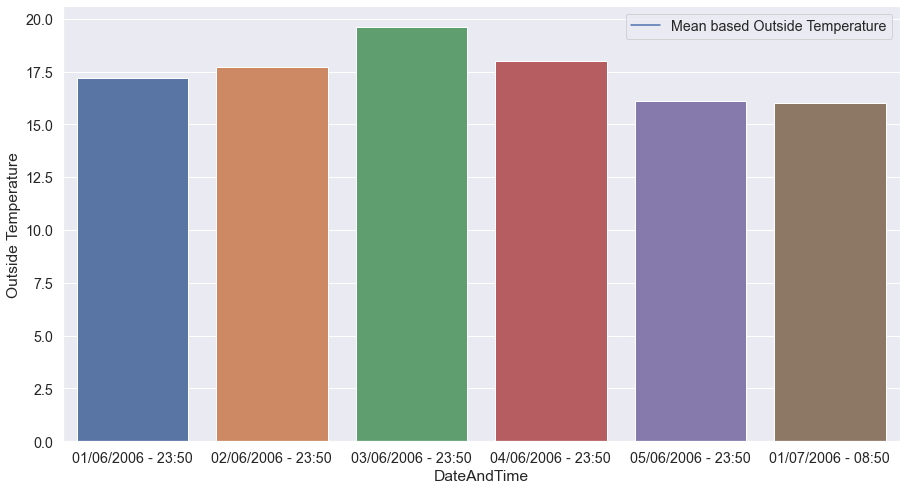

In [14]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)


# Visualizing all the temperature and provide detailed explaination 
df_data['Date'] = pd.to_datetime(df_data['Date']) 
Mean_Outside_Temperature_Date = df_data.resample('M', on='Date')['Outside Temperature'].mean() #we take out the mean of outside temperature and resample it based on date
#In this we store the mean of outside temperature for every month
Avg_Temp = pd.DataFrame({'Months':Mean_Outside_Temperature_Date.index, 'Mean based Outside Temperature':Mean_Outside_Temperature_Date.values})
print(Avg_Temp)
#plotting based on the average outside temperature for the month respectively.
Avg_Temp.plot(x="Months", y="Mean based Outside Temperature")


# The time period on a bar plot which has highest temperature for the first 5 days of every month

df_new = pd.read_csv('Weatherdataset.csv', encoding='latin1') #Reading the dataset in df_new dataframe
 
df_new['Date1'] = pd.to_datetime(df_new['Date'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y') #converting the foramt of date and storeing it in column Date1
df_new['day'] = pd.DatetimeIndex(df_new['Date1']).day #extracting the day from the date1
df_new['month'] = pd.DatetimeIndex(df_new['Date1']).month #extracting month from the date1
df1 = df_new.groupby([df_new['month'],df_new['day']]).max() #Taking out max value by grouping the month and day
df = df1[pd.DatetimeIndex(df1['Date1']).day <= 5] #Taking out the first 5 days from the data
dff = df[['Date','Time','Outside Temperature']]
dff["DateAndTime"] = dff['Date'].astype(str) +" - "+ dff["Time"] #This is used to store the date and time together for plotting 
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
ax = sns.barplot(x="DateAndTime", y="Outside Temperature", data=dff) #Barplot with x value as and y as outside temperature



# Task 4: 
Findng out an interesting information from the dataset. Creating two visualization for it.

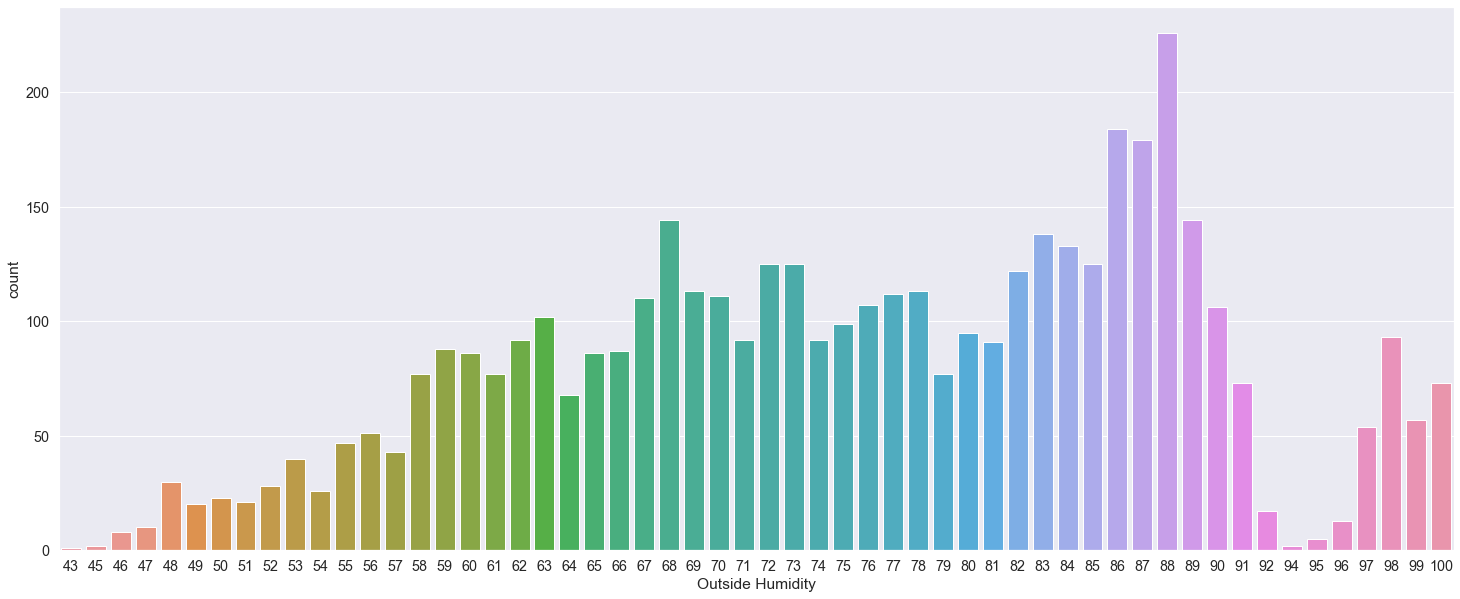

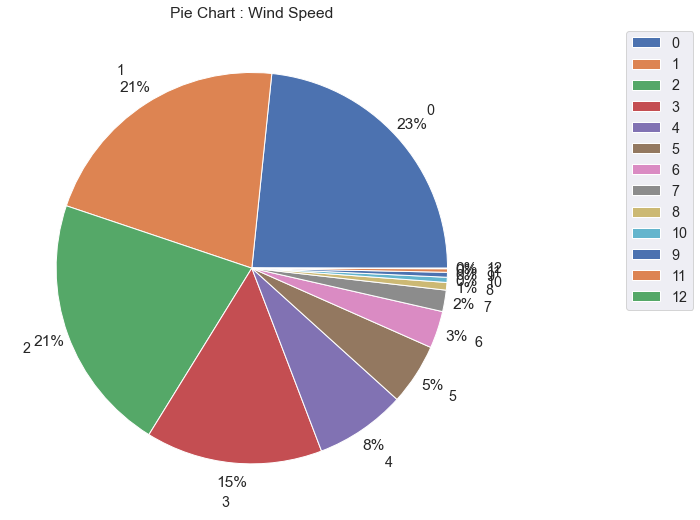

In [15]:

sns.set_style('whitegrid')
sns.set(font_scale = 1.3)
plt.figure(figsize=(25,10))
sns.countplot(x="Outside Humidity",data=df_data) #plottig an count plot taking the x as outside humidity and the count of it has Y.




df = df_data['WindSpeed'].value_counts().values #finding the count of each wind speed repectively.
labels = df_data['WindSpeed'].value_counts().index #taking the label of windpseed.
plt.figure(figsize=(9,9))
plt.pie(df,labels=labels ,autopct='%0.0f%%', pctdistance=1.1, labeldistance=1.2) #X and Y values are given and defined the pctdistance and labeldistance
plt.title("Pie Chart : Wind Speed") #title for the pie chart
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', labels=labels) #Legend and location for legend is specified
plt.show()

